# INERZIA DI UN DISCO + ANELLO

## RACCOLTA DATI

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata, final_val, decimal_val
import os

dir_path = os.path.abspath('') #os.path.dirname(os.path.realpath(__file__))
FILE = dir_path + '/../CSV/' + 'disco_anello.csv'
fr = pd.read_csv(FILE)

alfa1 = np.array(fr['Alfa1']) # lista rad/s^2
sigma_alfa1 = np.std(alfa1)
sigma_alfa1_media = sigma_alfa1/np.sqrt(len(alfa1))
w = np.array(fr['sigmaAlfa1'])
alfa1 = np.average(alfa1, weights=1/w**2)

alfa2 = np.array(fr['Alfa2']) # lista rad/s^2
sigma_alfa2 = np.std(alfa2)
sigma_alfa2_media = sigma_alfa2/np.sqrt(len(alfa2))
w = np.array(fr['sigmaAlfa2'])
alfa2 = np.average(alfa2, weights=1/w**2)

alfa3 = np.array(fr['Alfa3']) # lista deg/s^2
sigma_alfa3 = np.std(alfa3)
sigma_alfa3_media = sigma_alfa3/np.sqrt(len(alfa3))
w = np.array(fr['sigmaAlfa3'])
alfa3 = np.average(alfa3, weights=1/w**2)

m = np.array([50,70,85]) * 0.001 # masse campione in Kg
alfa = np.array([alfa1,alfa2,alfa3]) # gr/s^2

raggio = 0.01 # m (braccio)
alfa = (alfa/180) * np.pi # rad/s^2
sigma_alfa = np.array([sigma_alfa1,sigma_alfa2,sigma_alfa3]) # grd/s^2
sigma_alfa = (sigma_alfa/180)*np.pi #rad/s^2

r_disco = 0.05 #m
m_disco = 0.12 #Kg

r1 = 0.04 #m raggio esterno anello
r2 = 0.03 #m raggio interno anello
m_anello = 0.469 #Kg # massa anello

## ANALISI DATI

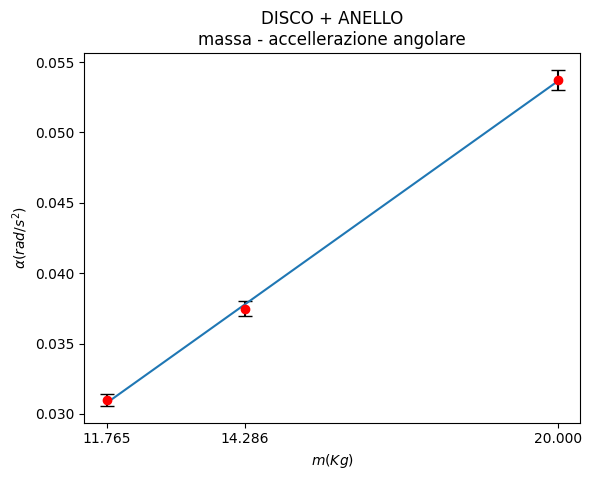


linearità A + BX
    
A: -0.0018561101234303994 
B: 0.0027744789977622035
sigmaA: 0.000996072701011731
sigmaB: 6.331496613344211e-05

sigmaY: [0.00071289 0.00052666 0.00042542]
chiquadro ridotto: 0.0
df: 1.5
    



In [20]:
r = RettaInterpolata(1/m, 1/alfa, sigma_alfa/alfa**2) # interpolazione
plt.errorbar(1/m,1/alfa,yerr=r.sigmaY,fmt='o',color='red',ecolor='black',capsize=5)
plt.plot(r.x_best,r.y_best) # array alta densità
plt.xticks(1/m)
plt.title("DISCO + ANELLO\nmassa - accellerazione angolare")
plt.ylabel("$\\alpha (rad/s^2)$")
plt.xlabel("$m (Kg)$")
plt.show()
print(r)

### inerzia attesa

$I = I_{disco} + I_{anello} = \frac{1}{2}m_{disco}R_{disco}^2 + \frac{1}{2}m_{anello} (R^2_1 - R_2^2)  $

In [21]:
I_disco = 0.5*m_disco*(r_disco**2)
I_anello = 0.5*m_anello*(r1**2 - r2**2)
I = I_disco + I_anello
print("Inerzia attesa disco+anello: ",decimal_val(I,exp=-4))

Inerzia attesa disco+anello:  3.14e-4 


### inerzia misurata

In [22]:
I = 9.8 * raggio * r.B
sigmaI = r.sigmaB * 8.31 * raggio # i sigmaB sono 3

print('Inerzia misurata disco: ',final_val(I,sigmaI,exp=-4))

Inerzia misurata disco:  (2.72 ± 0.05)e-4 
